## Generador de distribuciones:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.colors as mcolors
import matplotlib.cm as cm
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
%matplotlib inline

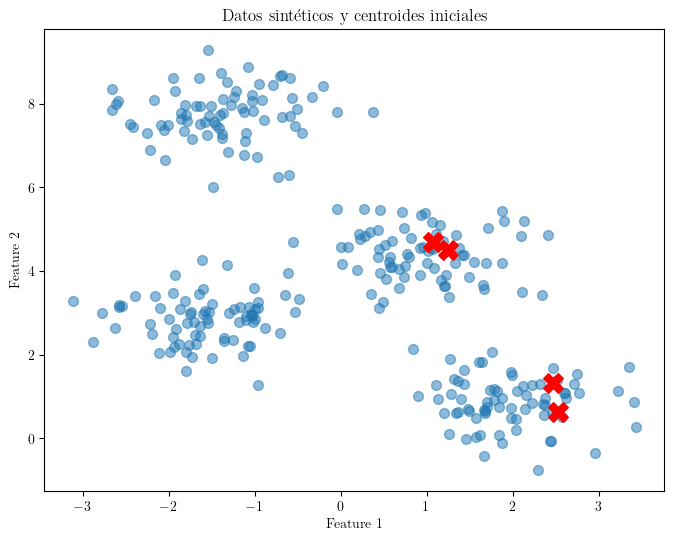

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generar datos sintéticos
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Inicializar los centroides
k = 4
np.random.seed(0)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Visualizar los datos y los centroides iniciales
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.title('Datos sintéticos y centroides iniciales')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

c:\Users\oscar\anaconda3\envs\all-in-purpose\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


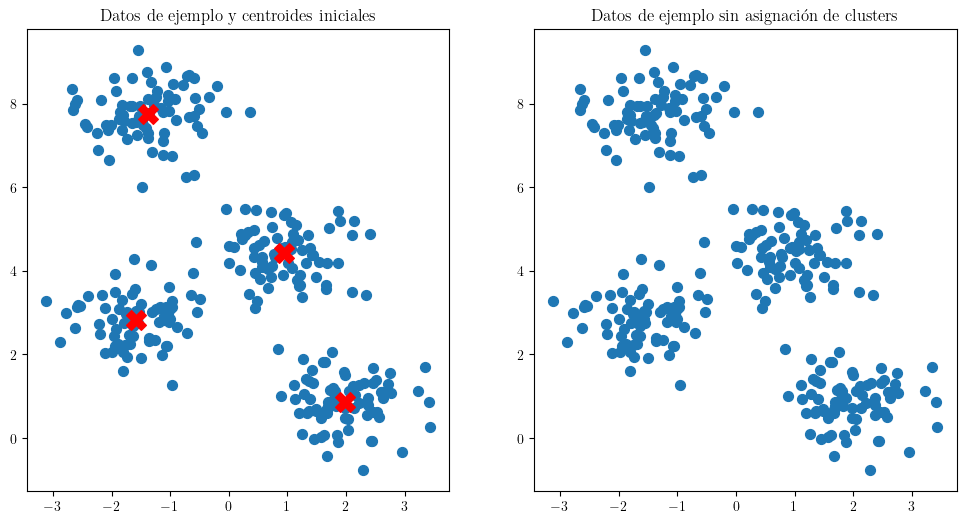

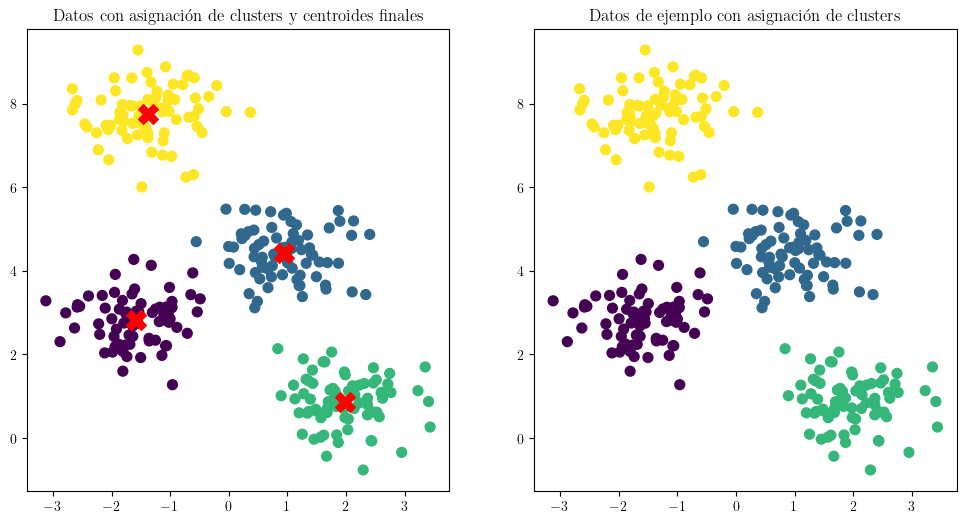

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Inicializar el modelo KMeans
kmeans = KMeans(n_clusters=4)

# Ajustar el modelo KMeans a los datos
kmeans.fit(X)

# Etapa 1 del algoritmo: antes de la asignación inicial de clusters
plt.figure(figsize=(12, 6))

# Subgráfico 1: Mostrar los datos y los centroides iniciales
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('Datos de ejemplo y centroides iniciales')

# Subgráfico 2: Mostrar los datos sin asignación de clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Datos de ejemplo sin asignación de clusters')

plt.show()

# Etapa 2 del algoritmo: después de la asignación de clusters
plt.figure(figsize=(12, 6))

# Subgráfico 1: Mostrar los datos con asignación de clusters
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('Datos con asignación de clusters y centroides finales')

# Subgráfico 2: Mostrar los centroides finales
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('Datos de ejemplo con asignación de clusters')

plt.show()


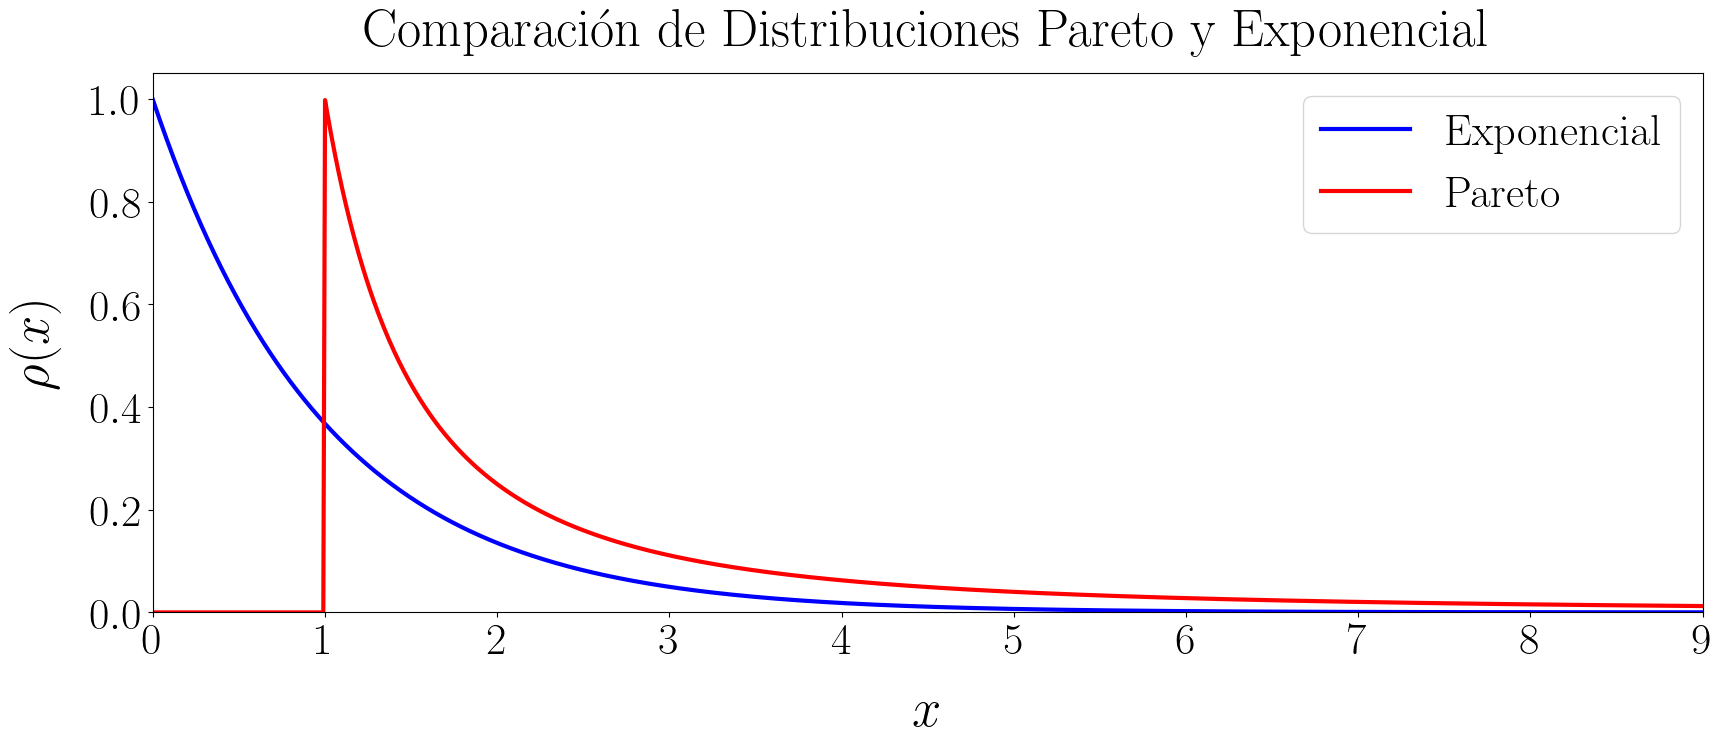

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, pareto
# Parámetros de la distribución exponencial
lambda_exp = 1  # Tasa de decaimiento exponencial

# Parámetros de la distribución de Pareto
alpha_pareto = 1  # Parámetro de forma de Pareto
xm_pareto = 1     # Valor mínimo de Pareto

# Generar datos para ambas distribuciones
x = np.linspace(0, 10, 1000)
exp_distribution = expon.pdf(x, scale=1/lambda_exp)
pareto_distribution = pareto.pdf(x, b=alpha_pareto, scale=xm_pareto)

# Graficar las distribuciones
plt.figure(figsize=(20, 7), facecolor='white')

plt.plot(x, exp_distribution, label='Exponencial', color='blue', linewidth=3)
plt.plot(x, pareto_distribution, label='Pareto', color='red', linewidth=3)
plt.title('Comparación de Distribuciones Pareto y Exponencial', fontsize=38, pad=20)
plt.xlabel(r'$x$', size=38, labelpad=20)
plt.ylabel(r'$\rho(x)$', fontsize=38, labelpad=20)
plt.legend(prop={'size': 32})
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.xlim(0,9)
plt.ylim(0)
plt.show()

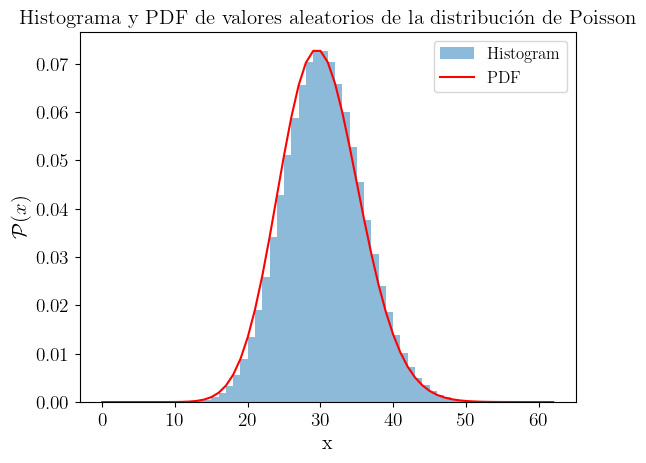

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
from scipy.stats import poisson
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import powerlaw #Powerlaw: A Python Package for Analysis of Heavy-Tailed Distributions
#Powerlaw: A Python Package for Analysis of Heavy-Tailed Distributions
#plt.rc('font', family='serif', serif='Times New Roman')


# Set the lambda parameter for the Poisson distribution
lambda_param = 30

# Generate random values from the Poisson distribution
random_values = np.random.poisson(lambda_param, size=2000000)

# Create a histogram of the random values
plt.hist(random_values, bins=55, density=True, alpha=0.5, label='Histogram')

# Create an array of values for x-axis
x = np.arange(0, np.max(random_values) + 1)

# Calculate the PDF values for the Poisson distribution
pdf_values = poisson.pmf(x, lambda_param)

# Plot the PDF curve
plt.plot(x, pdf_values, 'r-', label='PDF')

plt.xlabel('x', size=15)
plt.ylabel(r'$\mathcal{P}(x)$', size=15)
plt.yticks(size=14)
plt.xticks(size=14)
plt.title('Histograma y PDF de valores aleatorios de la distribución de Poisson', size =15)
plt.legend(fontsize=12)
plt.show()


In [5]:
12*10**np.linspace(0, 2.65, 51)

array([  12.        ,   13.55755098,   15.31726571,   17.30538422,
         19.55155239,   22.08926402,   24.95636025,   28.19559385,
         31.85526674,   35.98995023,   40.66129874,   45.9389692 ,
         51.90165972,   58.63828312,   66.24929271,   74.84818026,
         84.56316828,   95.53912205,  107.93970978,  121.94984314,
        137.77843458,  155.66151252,  175.86574091,  198.69239562,
        224.48185684,  253.61868478,  286.53735395,  323.72873189,
        365.74739876,  413.21991692,  466.85417399,  527.44993853,
        595.91078574,  673.25757124,  760.64365351,  859.37209226,
        970.91507901, 1096.93588976, 1239.31368691, 1400.17154047,
       1581.90808627, 1787.23329325, 2019.20887328, 2281.29393591,
       2577.39656896, 2911.9321141 , 3289.88900631, 3716.90315906,
       4199.34200434, 4744.39944082, 5360.20310581])

In [6]:
10**np.linspace(-1,2.65,51)

array([1.00000000e-01, 1.18304156e-01, 1.39958732e-01, 1.65576996e-01,
       1.95884467e-01, 2.31739465e-01, 2.74157417e-01, 3.24339617e-01,
       3.83707245e-01, 4.53941617e-01, 5.37031796e-01, 6.35330932e-01,
       7.51622894e-01, 8.89201118e-01, 1.05196187e+00, 1.24451461e+00,
       1.47231250e+00, 1.74180687e+00, 2.06062991e+00, 2.43781082e+00,
       2.88403150e+00, 3.41192912e+00, 4.03645393e+00, 4.77529274e+00,
       5.64936975e+00, 6.68343918e+00, 7.90678628e+00, 9.35405674e+00,
       1.10662378e+01, 1.30918192e+01, 1.54881662e+01, 1.83231442e+01,
       2.16770410e+01, 2.56448404e+01, 3.03389118e+01, 3.58921935e+01,
       4.24619564e+01, 5.02342590e+01, 5.94292159e+01, 7.03072320e+01,
       8.31763771e+01, 9.84011106e+01, 1.16412603e+02, 1.37720947e+02,
       1.62929603e+02, 1.92752491e+02, 2.28034207e+02, 2.69773943e+02,
       3.19153786e+02, 3.77572191e+02, 4.46683592e+02])

# Ejemplo de codo y silueta

#  Comportamiento check in new york


In [7]:
#Librerias y carga


# Initialize an empty list to store the data
data = []

# Open the text file for reading with the specified encoding
with open(r'C:\Users\oscar\OneDrive - Universidad Nacional de Colombia\Tesis\Comportamineto humano\Check-in-NY\dataset_tsmc2014\dataset_TSMC2014_NYC.txt', 'r', encoding='latin-1') as file:
    # Read each line in the file
    for line in file:
        # Split the line into columns based on the tab delimiter
        columns = line.strip().split('\t')
        
        # Append the columns to the data list
        data.append(columns)

# Define the column names
column_names = ['User ID', 'Venue ID', 'Venue category ID', 'Venue category name', 'Latitude', 'Longitude', 'Timezone offset in minutes', 'UTC time']

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=column_names)

# Optionally, convert columns to appropriate data types
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
df['Timezone offset in minutes'] = df['Timezone offset in minutes'].astype(int)

# Display the DataFrame
df.head()


,User ID,Venue ID,Venue category ID,Venue category name,Latitude,Longitude,Timezone offset in minutes,UTC time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [8]:
print('hay',df['User ID'].unique().size, 'usuarios únicos')
def get_most_entries_user(df):
    user_counts = df['User ID'].value_counts()
    most_entries_user = user_counts.idxmax()
    most_entries_count = user_counts.max()
    return most_entries_user, most_entries_count

most_entries_user, most_entries_count = get_most_entries_user(df)
print(f"The user ID with the most entries is {most_entries_user} with {most_entries_count} entries.")


hay 1083 usuarios únicos
The user ID with the most entries is 293 with 2697 entries.


## 1). Estudio Inter-Event time: User 293

In [9]:
df_filtered = df[df['User ID'] == '293'][['User ID', 'Timezone offset in minutes', 'UTC time']]
#pilas no lo esta tomando como tiempo 
df_filtered['UTC time'] = pd.to_datetime(df_filtered['UTC time'])
df_filtered = df_filtered.sort_values('UTC time')
df_filtered.head()

C:\Users\oscar\AppData\Local\Temp\ipykernel_13696\3541682032.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered['UTC time'] = pd.to_datetime(df_filtered['UTC time'])


,User ID,Timezone offset in minutes,UTC time
690,293,-240,2012-04-03 23:56:43+00:00
760,293,-240,2012-04-04 00:19:13+00:00
763,293,-240,2012-04-04 00:19:44+00:00
766,293,-240,2012-04-04 00:21:12+00:00
1121,293,-240,2012-04-04 04:53:06+00:00


### 1.2)Eventos y $\tau$

#### Voy a asumir que todos los eventos son sucesivos y calculo el tiempo

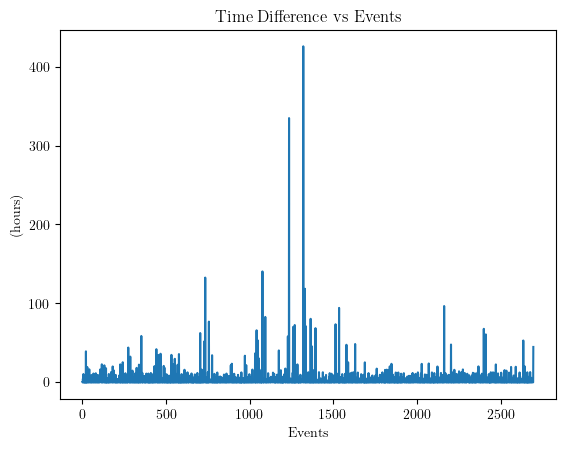

,User ID,Timezone offset in minutes,UTC time,Time Difference τ,Counter,Time Difference (hours)
690,293,-240,2012-04-03 23:56:43+00:00,NaT,0,NaN
760,293,-240,2012-04-04 00:19:13+00:00,0 days 00:22:30,1,0.375000
763,293,-240,2012-04-04 00:19:44+00:00,0 days 00:00:31,2,0.008611
766,293,-240,2012-04-04 00:21:12+00:00,0 days 00:01:28,3,0.024444
1121,293,-240,2012-04-04 04:53:06+00:00,0 days 04:31:54,4,4.531667


In [10]:
df_filtered['Time Difference τ'] = df_filtered['UTC time'].diff()
#el tiempo de diferencia es el tiempo que pasa entre cada uno de los eventos, el valor de las filas es el tiempo entre el anterior y esa fila 

# Create a counter column
df_filtered['Counter'] = range(len(df_filtered))

# Convert time difference to hours
df_filtered['Time Difference (hours)'] = df_filtered['Time Difference τ'].dt.total_seconds() / 3600

# Plot the graph
plt.plot(df_filtered['Counter'], df_filtered['Time Difference (hours)'])
plt.xlabel('Events')
plt.ylabel('(hours)')
plt.title('Time Difference vs Events')
plt.show()

df_filtered.head()


### 1.2)El histograma:


In [11]:
# Convert the time differences to an array
time_diff_array = np.array(df_filtered['Time Difference (hours)'])

# Remove NaN values from the array
time_diff_array = time_diff_array[~np.isnan(time_diff_array)]
time_diff_array.sort()

print(len(time_diff_array), max(time_diff_array), min(time_diff_array))
print(min(x for x in time_diff_array if x > min(time_diff_array)))

2696 425.63694444444445 0.0
0.0002777777777777778


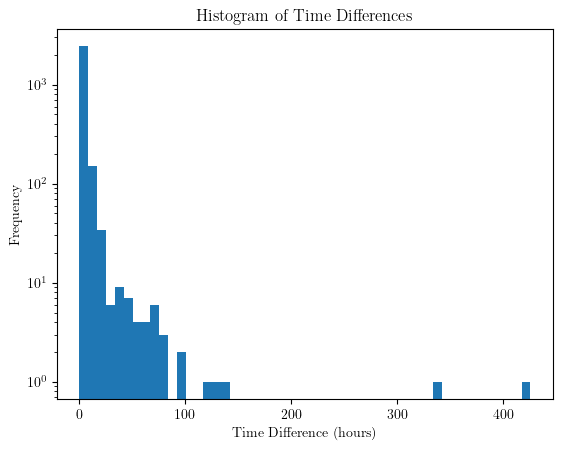

In [12]:
#EL HISTOGRAMA CON BINS NORMALES
plt.hist(time_diff_array, bins=51, log=True)#toma la frecuenecia en escala log, tenemos binds lineales
plt.xlabel('Time Difference (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Differences')
plt.show()


### 1.3)Rabdom distribucion pareto:


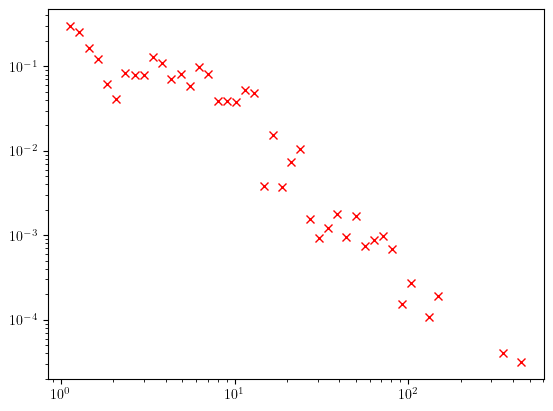

In [13]:
#vals,base=np.histogram(time_diff_array,bins=10**np.linspace(-1,3,51), density=True)
#la densidad cambia los valores del vals, el len de vals va ser igual al numero de bins que se tenga!! 
# If True, the result is the value of the probability density function at the bin, normalized such that the integral
# over the range is 1. Note that the sum of the histogram values will not be equal to 1 unless bins of unity width are 
# chosen; it is not a probability mass function.

#Calculo de la densidad de probabilidad vals
vals,base=np.histogram(time_diff_array,bins=10**np.linspace(0,2.65,51), density=True)

#Grafica de los valors de densidad de probabilidad
plt.loglog(base[1::],vals,'rx')#[1::] es por la dimension

### 1.4)Fiting power laws to empirical data:

In [14]:

def plot_power_law(time_diff_array, bins):
    plt.figure(figsize=(6,4), facecolor='white')
    fit = powerlaw.Fit(time_diff_array)
    alpha = fit.alpha
    xmin = fit.xmin
    fit.power_law.plot_pdf(color='black', linestyle='--', linewidth=1, label=r'$\mathcal{P}(\tau) \propto \tau^{-2.3}$')#linea de fit, falta el error
    #fit.plot_pdf(color='b', linewidth=2)
    fit.plot_pdf(linestyle='None', marker='o', markersize=3,color='royalblue')
    vals, base = np.histogram(time_diff_array, bins=bins, density=True)
    plt.loglog(base[1::], vals, 'o', markersize=3, color='royalblue')
    plt.xlim(0,1000)
    plt.yticks(size=14)
    plt.xticks(size=14)
    plt.xlabel(r'$\tau$(horas)', size=15)
    plt.ylabel(r'$\mathcal{P}(\tau)$', size=15)
    plt.title('', size=15)
    plt.legend(fontsize=12)
    plt.show()



    fit.plot_pdf(color='b', linewidth=2)
    plt.xlabel('Time Difference (hours)')
    plt.ylabel('Probability Density')
    plt.title('Probability Density Function')
    plt.show()
    print (alpha, xmin)


In [15]:
10**np.linspace(0, 2.65, 51)

array([  1.        ,   1.12979591,   1.27643881,   1.44211535,
         1.62929603,   1.840772  ,   2.07969669,   2.34963282,
         2.65460556,   2.99916252,   3.38844156,   3.82824743,
         4.32513831,   4.88652359,   5.52077439,   6.23734835,
         7.04693069,   7.9615935 ,   8.99497582,  10.16248693,
        11.48153621,  12.97179271,  14.65547841,  16.55769963,
        18.7068214 ,  21.1348904 ,  23.87811283,  26.97739432,
        30.4789499 ,  34.43499308,  38.9045145 ,  43.95416154,
        49.65923215,  56.1047976 ,  63.38697113,  71.61434102,
        80.90958992,  91.41132415, 103.27614058, 116.68096171,
       131.82567386, 148.93610777, 168.26740611, 190.10782799,
       214.78304741, 242.66100951, 274.15741719, 309.74192992,
       349.94516703, 395.36662007, 446.68359215])

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


C:\Users\oscar\AppData\Local\Temp\ipykernel_13696\1779079543.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1000)


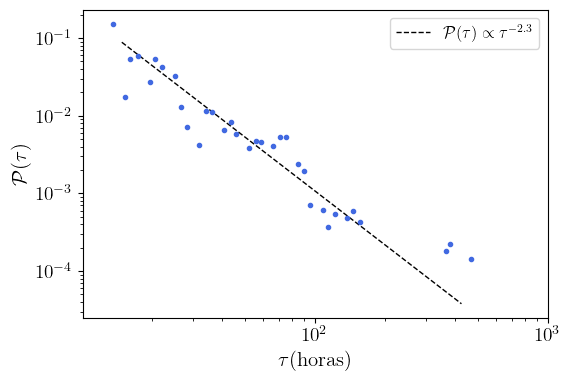

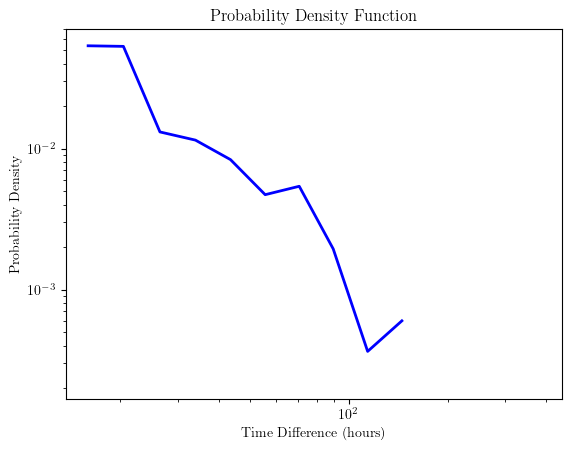

2.3080519394552974 14.785


In [16]:
plot_power_law(time_diff_array, 12*10**np.linspace(0, 2.65, 51))

Yo veo 2 opciones, 1)que de mis datos los iniciales no sigan un power law y por eso no se vea correcto, seria cortar el time dif array y tomar solo esos valores. 2) De pronto graficabdo el pdf. 3) Mirar los puntos rojos del fit

## Now for all of the users: (POR CORREGIR)

In [17]:
df_all = df[['User ID', 'Timezone offset in minutes', 'UTC time']]
#pilas no lo esta tomando como tiempo 
df_all['UTC time'] = pd.to_datetime(df_all['UTC time'])
#ORGANIZANDO POR USUARIO Y POR TIEMPO
df_all = df_all.sort_values('UTC time')
df_all = df_all.sort_values(['User ID', 'UTC time'])# con esto se organiza de tal forma que se tiene en cuanta  la 
#fecha asendente de FINALIZACION, EL FINAL DE UN USUARIO siempre es antes que el final del siguiente 
#No se si esta bien, pero es una forma de organizarlo!

#df_all['Time Difference τ'] = df_all.groupby('User ID')['UTC time'].diff()

df_all.head(110)

#df_all.to_csv('filename.csv', index=False)



C:\Users\oscar\AppData\Local\Temp\ipykernel_13696\223816638.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['UTC time'] = pd.to_datetime(df_all['UTC time'])
C:\Users\oscar\AppData\Local\Temp\ipykernel_13696\223816638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['UTC time'] = pd.to_datetime(df_all['UTC time'])


,User ID,Timezone offset in minutes,UTC time
2454,1,-240,2012-04-04 23:31:31+00:00
3660,1,-240,2012-04-07 17:42:24+00:00
5603,1,-240,2012-04-08 18:20:29+00:00
5783,1,-240,2012-04-08 20:02:10+00:00
6696,1,-240,2012-04-09 16:20:52+00:00
...,...,...,...
196135,1,-300,2012-12-15 00:13:02+00:00
991,10,-240,2012-04-04 02:30:04+00:00
992,10,-240,2012-04-04 02:30:22+00:00
1958,10,-240,2012-04-04 17:01:17+00:00


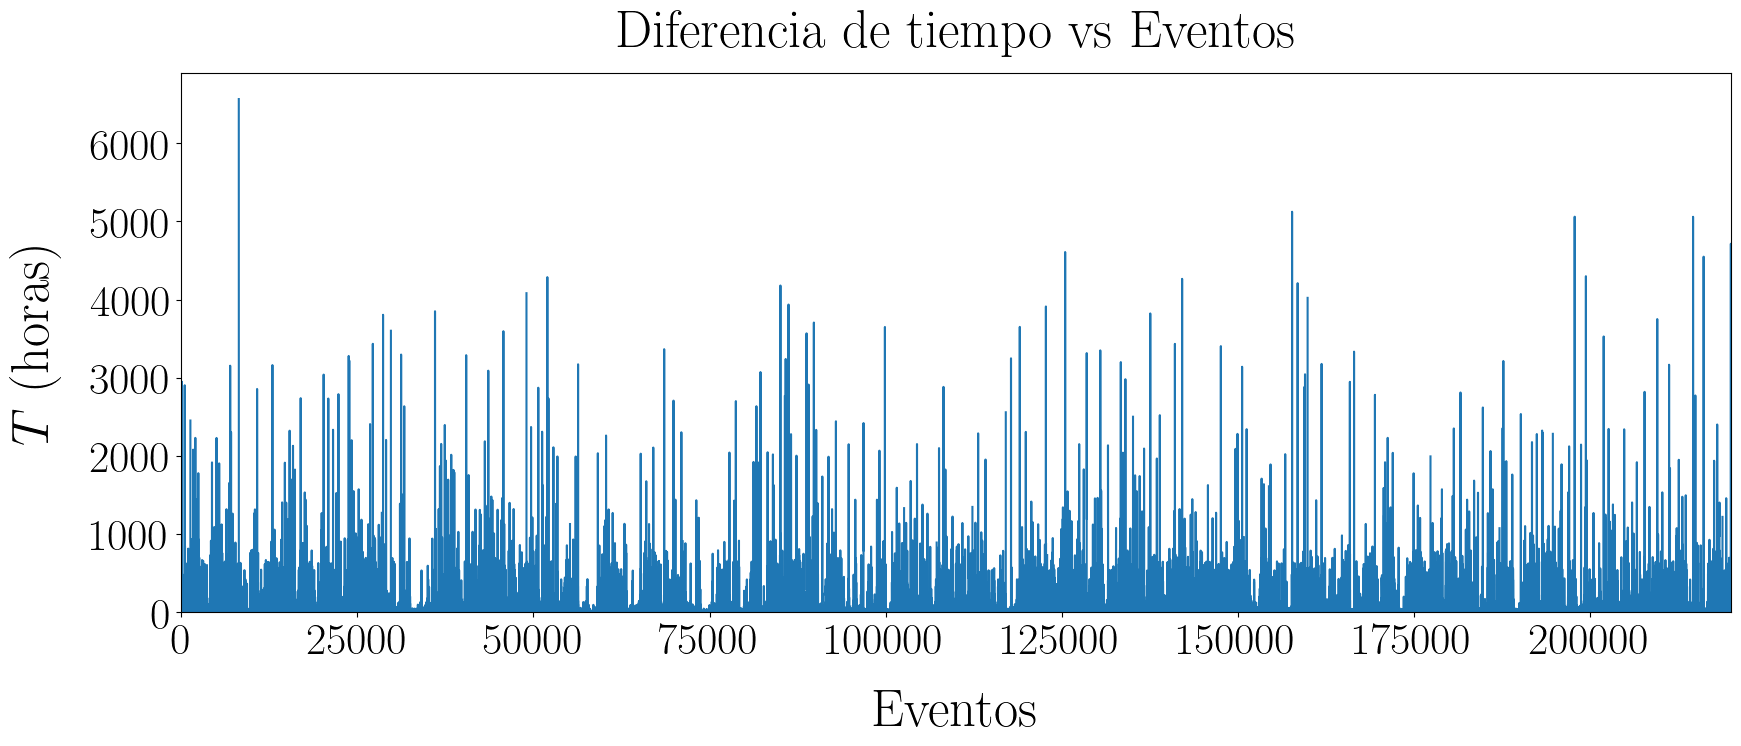

In [18]:

# Calculate the time difference
df_all['Time Difference τ'] = df_all.groupby('User ID')['UTC time'].diff()

# Create a counter column for all users
df_all['Counter'] = range(len(df_all))

# Convert time difference to hours
df_all['Time Difference (hours)'] = df_all['Time Difference τ'].dt.total_seconds() / 3600


# Set the figure size
plt.figure(figsize=(20, 7))

# Plot the graph
plt.plot(df_all['Counter'], df_all['Time Difference (hours)'])
plt.xlabel('Eventos', size=38, labelpad=20)
plt.ylabel(r'$T$ (horas)',size=38, labelpad=20)
plt.yticks(size=32)
plt.xticks(size=32)
plt.title('Diferencia de tiempo vs Eventos', size=38, pad=20)
# Set the x-axis limits to start from 0
plt.xlim(0, 220000)

# Set the y-axis limits to start from 0
plt.ylim(0)

plt.show()
#Caption of the figure: Time difference between consecutive events for all users in the dataset. The time difference is calculated in hours.

In [19]:
df_all.head()

,User ID,Timezone offset in minutes,UTC time,Time Difference τ,Counter,Time Difference (hours)
2454,1,-240,2012-04-04 23:31:31+00:00,NaT,0,NaN
3660,1,-240,2012-04-07 17:42:24+00:00,2 days 18:10:53,1,66.181389
5603,1,-240,2012-04-08 18:20:29+00:00,1 days 00:38:05,2,24.634722
5783,1,-240,2012-04-08 20:02:10+00:00,0 days 01:41:41,3,1.694722
6696,1,-240,2012-04-09 16:20:52+00:00,0 days 20:18:42,4,20.311667


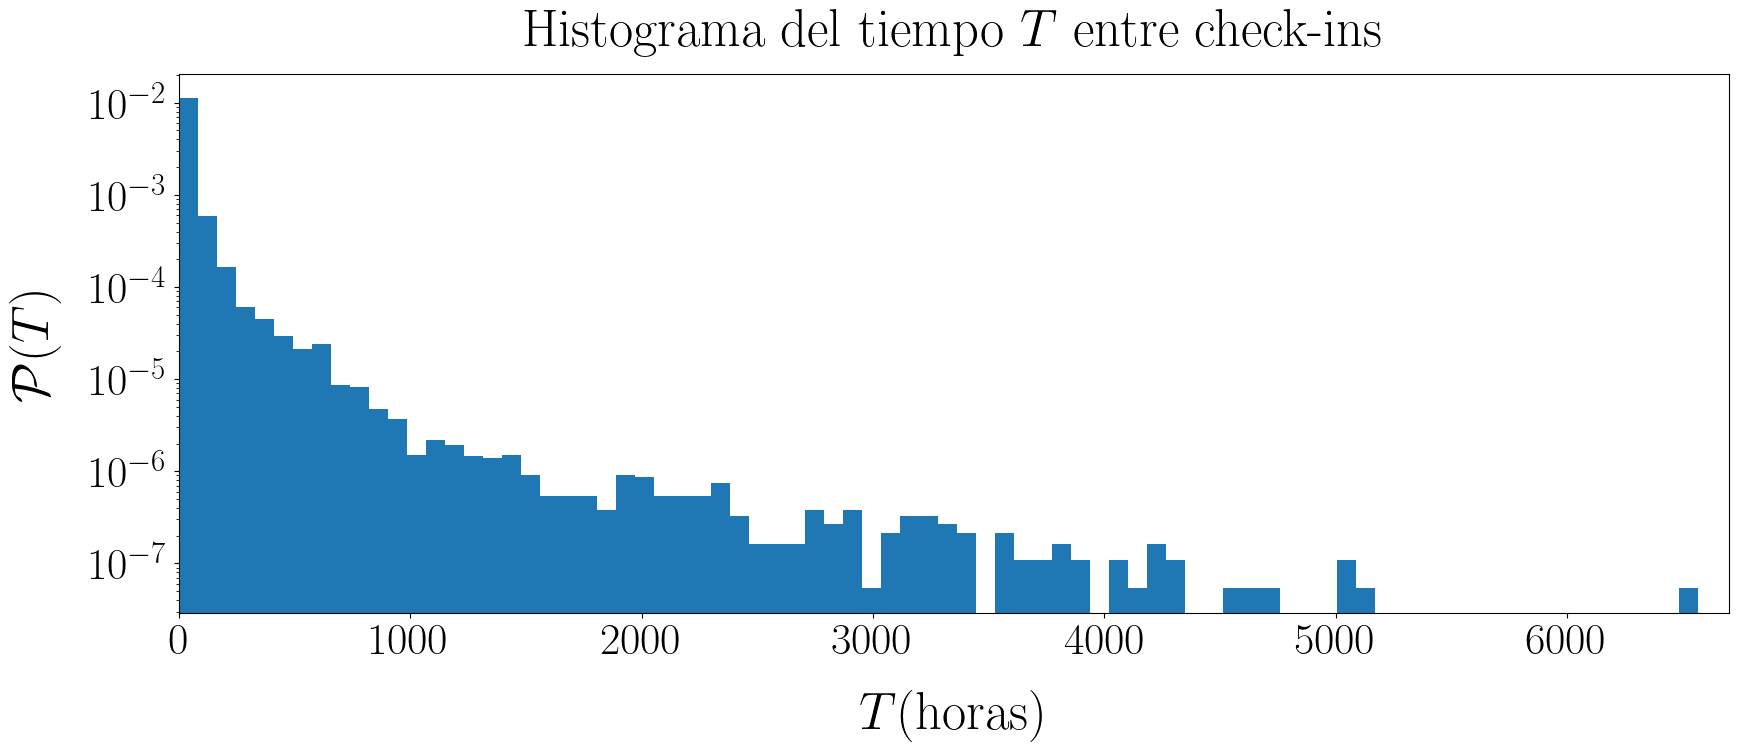

In [20]:
time_diff = df_all['Time Difference (hours)']
plt.figure(figsize=(20,7), facecolor='white')
# Convert the time differences to an array
time_diff_array_all = np.array(time_diff)
time_diff_array_all = time_diff_array_all[~np.isnan(time_diff_array_all)]
time_diff_array_all.sort()
plt.hist(time_diff_array_all, bins=80, log=True, density=True)#toma la frecuenecia en escala log, tenemos binds lineales
plt.xlabel(r'$T$(horas)', size=38, labelpad=20)
plt.ylabel(r'$\mathcal{P}(T)$', size=38, labelpad=20)
plt.title(r'Histograma del tiempo $T$ entre check-ins', size=38, pad=20)
plt.yticks(size=32)
plt.xticks(size=32)
plt.xlim(0,6700)
plt.show()
#caption of the figure : Histogram of time differences between consecutive check-ins for all users in the dataset. The time difference is calculated in hours.

In [21]:


fit = powerlaw.Fit(time_diff_array_all)
alpha = fit.alpha
xmin = fit.xmin

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


C:\Users\oscar\AppData\Local\Temp\ipykernel_13696\4118826696.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,7000)


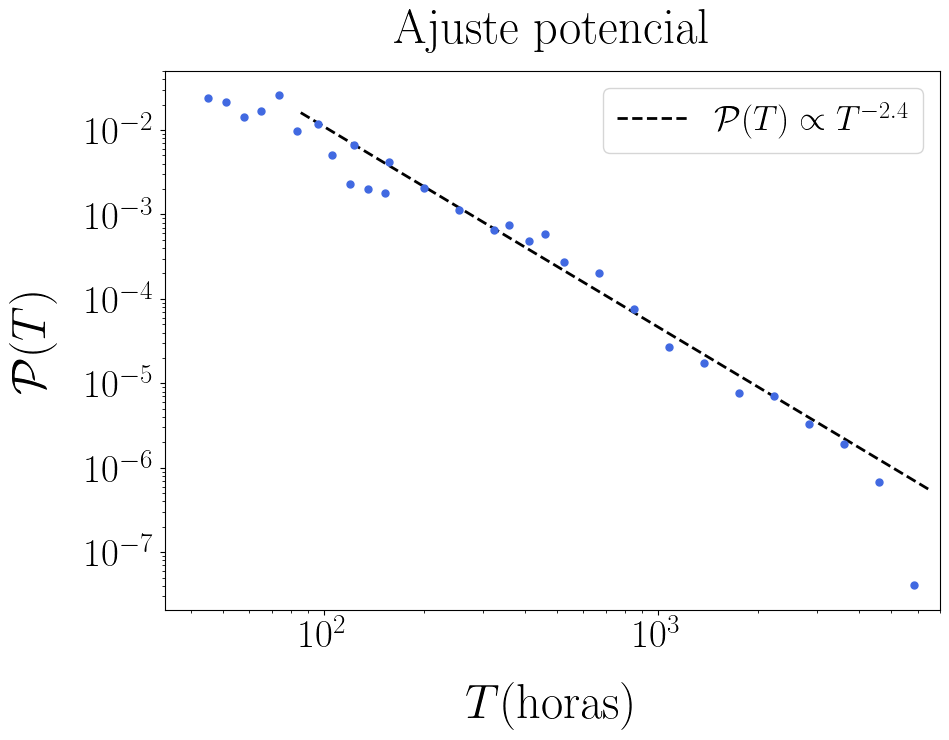

2.3734792061280436 85.47


In [22]:
plt.figure(figsize=(10,7), facecolor='white')
bins=40*10**np.linspace(0, 2.65, 51)
fit.power_law.plot_pdf(color='black', linestyle='--', linewidth=2, label=r'$\mathcal{P}(T) \propto T^{-2.4}$')#linea de fit, falta el error
#fit.plot_pdf(color='b', linewidth=2)
fit.plot_pdf(linestyle='None', marker='o', markersize=5,color='royalblue')
vals, base = np.histogram(time_diff_array, bins=bins, density=True)
plt.loglog(base[1::], vals, 'o', markersize=5, color='royalblue')
plt.xlim(0,7000)
plt.yticks(size=28)
plt.xticks(size=28)
plt.xlabel(r'$T$(horas)', size=35, labelpad=20)
plt.ylabel(r'$\mathcal{P}(T)$', size=35, labelpad=20)
plt.title('Ajuste potencial', size=35, pad=20)
plt.legend(fontsize=25)
plt.show()
print (alpha, xmin)
#caption: Power-law fit of the probability density function of the time differences between consecutive check-ins for all users in the dataset. The time difference is calculated in hours. The power-law exponent is approximately -2.4.